# ESmulti class - electronic structure computation for multiple geometries and bondscans

The `ESmulti` class wraps `ESgamess` and provides additional functionality for handling mulitple geometries.

- Base class and methods are available at `self.ESbase`.
- `runGeomScan()` method for running bond-scan type jobs, outputs are stored in `self.geomScan`.
- `runCoordScan()` method for running jobs from sets of input coordinates. (TODO)

In [1]:
# Import class
from epsman.elecStructure.ESmulti import ESmulti

## Bondscans - init from reference molecule and scan a bond

In this case:

- Create a base molecule as the reference case (see the [basic class demo](ESgamess_class_demo_221123-tidy.html) for more details).
    - By default, ESmulti will try to configure and run Gamess for the reference case.
    - To avoid this, pass `buildES = False` at class init.
    - If `buildES=false`, an additional call to `self.ESbase.initGamess()` is required to configure Gamess.
- Set a dictionary of parameters to scan over using `self.runGeomScan` method.
- Run Gamess calcs for each molecular configuration (using the same settings).
- Return results to `self.geomScan` dictionary.

Note - in some cases Gamess may return E = 0 for a set of geometries. In this case, try troubleshooting the base molecule first.

### Init system (template for bondscan)

Set name = N2O
Set smiles = None
Set molFile = None
Set pd = None
Set xyz = None
Set molOverride = None
*** File /mnt/femtobackSSHFS/DriveSyncShare/code-share/github-share/epsman/demos/N2O.SDF already exists; existing file will be used. Pass overwrite=True to overwrite.
Set job = N2O bondscan demo
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


[13:06:44] Warning: molecule is tagged as 3D, but all Z coords are zero


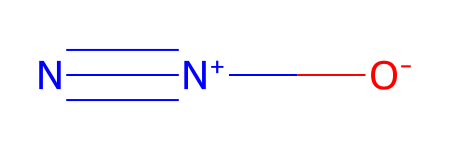

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


*** Running default Gamess job.
*** Updating coords (Pandas version).
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.1096
2,2,N,7,0.0,0.0,-1.1967


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x wkiyrb -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/wkiyrb.out


*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
N2O bondscan demo
C1
O      8.0      0.0000000000    0.0000000000    1.3063000000 
N      7.0      0.0000000000    0.0000000000   -0.1096000000 
N      7.0      0.0000000000    0.0000000000   -1.1967000000 
 $END

*** Found Gamess executable: /opt/gamess/gamess.00.x
*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -181.1830797993


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.1096
2,2,N,7,0.0,0.0,-1.1967


In [2]:
# *** Init molecule

# Example 1: default case.
# Note this runs with buildES = True by default, set buildES=False to skip initial Gamess run
demoMulti = ESmulti(searchName = 'N2O', job = 'N2O bondscan demo')  # In testing N2O case giving E=0, not sure why

# Example 2 - without buildES, in this case .initGamess() is also required.
# demoMulti = ESmulti(searchName = 'N2O', job = 'N2O bondscan demo', buildES = False)
# demoMulti.ESbase.initGamess()

### Set additional configuration options

The base molecule, including Gamess configuration, is used as the template for the bondscan, so any additional parameters must be configured prior to the scan.

See [the basic ESgamess class intro doc for more](ESgamess_class_demo_221123-tidy.html#Additional-Gamess-parameters) for more on parameter setting.

In [3]:
# Modify settings as desired for the base molecule
# This is used as the template for the geomScan

# E.g. change basis set
demoMulti.ESbase.setBasis("6-311G")

# Increase max iterations (default = 30)
demoMulti.ESbase.setParam(inputGroup='contrl',inputDict={'maxit':200})

Set basis to specification 6-311G.
self.params['basis']: {'gbasis': 'N311', 'ngauss': '6'}
Updating existing group 'contrl'. (To replace group, pass 'resetGroup=True')
Updated group 'contrl': {'scftyp': 'rhf', 'runtyp': 'energy', 'maxit': 200}


### Run bondscan

- Create set of geometries,
    - Dictionary form as supported by `setBondLength()`, see the [ESgamess class intro docs for details](ESgamess_class_demo_221123-tidy.html#Bond-lengths-&-angles).
    - Pandas dataframe or dictionary form as supported by `setCoords()`, [ESgamess class intro docs for details](ESgamess_class_demo_221123-tidy.html#Manual-coords). Note this form is more general, and is demonstrated later as the general "geometry scan" case.
- Run Gamess calculations. (Note this is similar, but slightly distinct, from Gamess native bond-length scan, since one wants to generate a single file for each case here, to be used as ePolyScat input.)
- Outputs are a set of Gamess files, and data in the workspace at `self.geomScan`.

*** Running geometry scan for 18 points.

*** Running geom 1/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,0.2063
2,2,N,7,0.0,0.0,-0.8808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ouotbp -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ouotbp.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ouotbp -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ouotbp.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.5873718684
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.1.out

*** Running geom 2/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,0.1563
2,2,N,7,0.0,0.0,-0.9308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x rwynzb -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/rwynzb.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x rwynzb -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/rwynzb.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.60365134040001
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.15.out

*** Running geom 3/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,0.1063
2,2,N,7,0.0,0.0,-0.9808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x zauxui -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/zauxui.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x zauxui -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/zauxui.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.6107083855
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.2.out

*** Running geom 4/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,0.0563
2,2,N,7,0.0,0.0,-1.0308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x iuxozj -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/iuxozj.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x iuxozj -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/iuxozj.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.6118848525
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.25.out

*** Running geom 5/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,0.0063
2,2,N,7,0.0,0.0,-1.0808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x nfckzw -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/nfckzw.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x nfckzw -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/nfckzw.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.6096745955
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.3.out

*** Running geom 6/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.0437
2,2,N,7,0.0,0.0,-1.1308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x drmjly -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/drmjly.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x drmjly -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/drmjly.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.6058512221
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.35.out

*** Running geom 7/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.0937
2,2,N,7,0.0,0.0,-1.1808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ogoglm -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ogoglm.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ogoglm -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ogoglm.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.6015781628
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.4.out

*** Running geom 8/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.1437
2,2,N,7,0.0,0.0,-1.2308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x iorbsg -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/iorbsg.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x iorbsg -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/iorbsg.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.59752832949999
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.45.out

*** Running geom 9/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.1937
2,2,N,7,0.0,0.0,-1.2808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ofvoce -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ofvoce.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ofvoce -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ofvoce.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.59401656310001
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.5.out

*** Running geom 10/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.2437
2,2,N,7,0.0,0.0,-1.3308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x dzhotj -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/dzhotj.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x dzhotj -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/dzhotj.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.59112784569999
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.55.out

*** Running geom 11/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.2937
2,2,N,7,0.0,0.0,-1.3808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x qsbgmp -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/qsbgmp.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x qsbgmp -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/qsbgmp.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.5888215784
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.6.out

*** Running geom 12/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.3437
2,2,N,7,0.0,0.0,-1.4308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ujfgth -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ujfgth.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ujfgth -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ujfgth.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.5870032942
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.65.out

*** Running geom 13/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.3937
2,2,N,7,0.0,0.0,-1.4808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x dbroja -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/dbroja.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x dbroja -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/dbroja.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.5855669394
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.7.out

*** Running geom 14/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.4437
2,2,N,7,0.0,0.0,-1.5308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x auwvbm -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/auwvbm.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x auwvbm -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/auwvbm.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = 0
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.75.out

*** Running geom 15/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.4937
2,2,N,7,0.0,0.0,-1.5808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x cfoqhs -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/cfoqhs.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x cfoqhs -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/cfoqhs.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.58347183270001
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.8.out

*** Running geom 16/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.5437
2,2,N,7,0.0,0.0,-1.6308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x zistot -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/zistot.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x zistot -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/zistot.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = 0
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.85.out

*** Running geom 17/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.5937
2,2,N,7,0.0,0.0,-1.6808


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x fswqrr -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/fswqrr.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x fswqrr -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/fswqrr.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = 0
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.9.out

*** Running geom 18/18.
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.6437
2,2,N,7,0.0,0.0,-1.7308


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x hhdouh -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/hhdouh.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x hhdouh -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/hhdouh.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = 0
*** Gamess output file moved to /tmp/N2O_geomScan_test_jan2024_1.95.out

*** Geom scan completed.
*** Warning: found E=0 for 4 case(s), calculations may be unconverged. Check self.geomScan['summary']['Ezeros'] for details.


,a1,a2,l,E
1.10,0.0,1.0,1.10,-183.587372
1.15,0.0,1.0,1.15,-183.603651
1.20,0.0,1.0,1.20,-183.610708
1.25,0.0,1.0,1.25,-183.611885
1.30,0.0,1.0,1.30,-183.609675
1.35,0.0,1.0,1.35,-183.605851
1.40,0.0,1.0,1.40,-183.601578
1.45,0.0,1.0,1.45,-183.597528
1.50,0.0,1.0,1.50,-183.594017
1.55,0.0,1.0,1.55,-183.591128


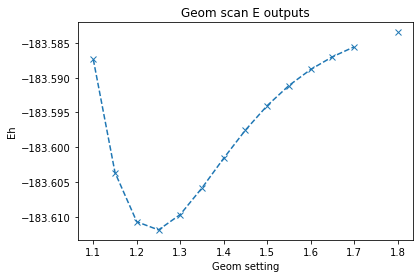

In [4]:
#*** Bondscan (scan 1 bond)
import numpy as np

# Set dictionary
# Scan bond between a1=0 and a2=1, over range v, 
# where a1,a2 are atom indexes (as shown in the geometry table).
geomDict = {v:{'a1':0,'a2':1,'l':v} for v in np.around(np.arange(1.1,2.0,0.05),3)}

# Run a bond scan - pass `bondDict` for the 1D scan case.
demoMulti.runGeomScan(bondDict = geomDict, fileBase = '/tmp/N2O_geomScan_test_jan2024')

In [5]:
# Results are printed during the run if self.verbose>0 (as above).
# They are also output to self.geomScan, for each geometry
demoMulti.geomScan.keys()

dict_keys([1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 'summary'])

In [6]:
# This includes file locations and an ESgamess class object for each case
demoMulti.geomScan[1.75].keys()

dict_keys(['mol', 'fileOut'])

In [7]:
# The summary item contains some general info
demoMulti.geomScan['summary'].keys()

dict_keys(['fileList', 'E', 'Ezeros', 'geom', 'pd'])

In [8]:
# Note that Ezeros tracks any cases with E=0, which generally indicates an unconverged calculation
demoMulti.geomScan['summary']['Ezeros']

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True]

In [9]:
# And the full output tabulation as a Pandas Dataframe
# Note here that E=0 cases are replaced with np.nan in the default case.
# Pass `zeroFill=False` to self.runGeomScan() to keep E=0 cases intact.
demoMulti.geomScan['summary']['pd']

,a1,a2,l,E
1.10,0.0,1.0,1.10,-183.587372
1.15,0.0,1.0,1.15,-183.603651
1.20,0.0,1.0,1.20,-183.610708
1.25,0.0,1.0,1.25,-183.611885
1.30,0.0,1.0,1.30,-183.609675
1.35,0.0,1.0,1.35,-183.605851
1.40,0.0,1.0,1.40,-183.601578
1.45,0.0,1.0,1.45,-183.597528
1.50,0.0,1.0,1.50,-183.594017
1.55,0.0,1.0,1.55,-183.591128


In [10]:
# Any ESgamess class methods are also available for each case, as the 'mol' item
# Some examples are given below, see the main demo doc for more.
# https://epsman.readthedocs.io/en/latest/demos/ESgamess_class_demo_221123-tidy.html

# Print full Gamess output
# demoMulti.geomScan[1.75]['mol'].printGamess()

# Print tail
# demoMulti.geomScan[1.75]['mol'].tail()

# Print geom table
demoMulti.geomScan[1.75]['mol'].printTable()

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3063
1,1,N,7,0.0,0.0,-0.4437
2,2,N,7,0.0,0.0,-1.5308


## Generating electronic strucutres for a range of geometries

In this case, run a single-point calculation for each specified geometry.

Geometries can be set manually, or via existing methods supported by `setCoords()`.

### Setting positions via a dictionary

In [11]:
# Manual example

# Check an existing case, and use as reference
# print(demoMulti.geomScan[1.5]['mol'].atomsDict['coordDict'])
print(demoMulti.ESbase.atomsDict['coordDict'])

# Set some geometries - dictionary form
# Set coords for specified atoms only
newCoords = {'set1':{0:[0,0,1.33], 1:[0,0,0]}}

# Set coords for all atoms
newCoords['set2'] = {0:[0,0,1.378], 1:[0,-0.1,0], 2:[-0.2,-0.2,-1.3]}
newCoords['set3'] = {0:[0,0,1.42], 1:[0,-0.2,0], 2:[0.3,-0.2,-1.3]}

newCoords

{0: {'x': 0.0, 'y': 0.0, 'z': 1.3063}, 1: {'x': 0.0, 'y': 0.0, 'z': -0.1096}, 2: {'x': 0.0, 'y': 0.0, 'z': -1.1967}}


{'set1': {0: [0, 0, 1.33], 1: [0, 0, 0]},
 'set2': {0: [0, 0, 1.378], 1: [0, -0.1, 0], 2: [-0.2, -0.2, -1.3]},
 'set3': {0: [0, 0, 1.42], 1: [0, -0.2, 0], 2: [0.3, -0.2, -1.3]}}

*** Running geometry scan for 3 points.

*** Running geom 1/3.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.3300
1,1,N,7,0.0,0.0,0.0000
2,2,N,7,0.0,0.0,-1.1967


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x thhndi -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/thhndi.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x thhndi -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/thhndi.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -183.58114386880001
*** Gamess output file moved to /tmp/N2O_geomScan_test_2_jan2024_set1.out

*** Running geom 2/3.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.378
1,1,N,7,0.0,-0.1,0.000
2,2,N,7,-0.2,-0.2,-1.300


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ayuotz -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ayuotz.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ayuotz -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/ayuotz.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = 0
*** Gamess output file moved to /tmp/N2O_geomScan_test_2_jan2024_set2.out

*** Running geom 3/3.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.42
1,1,N,7,0.0,-0.2,0.00
2,2,N,7,0.3,-0.2,-1.30


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x pyhhtx -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/pyhhtx.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x pyhhtx -ddi 1 1 jake -scr /tmp/tmpz5ahzmk9 > /tmp/tmpz5ahzmk9/pyhhtx.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = 0
*** Gamess output file moved to /tmp/N2O_geomScan_test_2_jan2024_set3.out

*** Geom scan completed.
*** Warning: found E=0 for 2 case(s), calculations may be unconverged. Check self.geomScan['summary']['Ezeros'] for details.


,0,1,2,E
set1,"[0, 0, 1.33]","[0, 0, 0]",NaN,-183.581144
set2,"[0, 0, 1.378]","[0, -0.1, 0]","[-0.2, -0.2, -1.3]",NaN
set3,"[0, 0, 1.42]","[0, -0.2, 0]","[0.3, -0.2, -1.3]",NaN


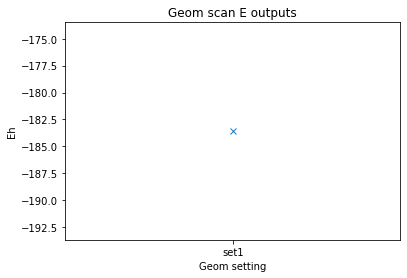

In [12]:
# Run a bond scan - pass `positionsDict` for the arbitrary positions case
demoMulti.runGeomScan(positionsDict = newCoords, fileBase = '/tmp/N2O_geomScan_test_2_jan2024')

### Setting positions from a file

Currently only sets of geometries in Molden style are supported directly.

Note, however, that the file parser should be somewhat general, and can be set to look for different keywords and field widths as required, although other input types have not yet been tested.

See the [API docs for further details and options](https://epsman.readthedocs.io/en/latest/modules/epsman.elecStructure.util.html#epsman.elecStructure.util.readMoldenGeoms).

#### Read positions from file

In [13]:
# Load file reader
from epsman.elecStructure.util import readMoldenGeoms

fileIn = 'OCS_geom_test.molden'

In [14]:
# Show example of input file format (Molden format)
from itertools import islice
with open(fileIn, 'r') as f:
    for line in islice(f, 10):
        print(line.strip('\n'))

! Geometry     1
[Atoms] Angs
O     1    8        0.0000000000        0.0000000000        1.6823745030
C     2    6        0.0000000000        0.0000000000        0.5299428780
S     3   16        0.0000000000        0.0000000000       -1.0409749970
! Geometry     2
[Atoms] Angs
O     1    8       -0.0063927500       -0.0016230650        1.6690513100
C     2    6        0.0147512290        0.0037452120        0.5339956840
S     3   16       -0.0023425710       -0.0005947590       -1.0358303560


In [15]:
# Read a file
geoms = readMoldenGeoms(fileIn, verbose = 0)

*** Reading geometries from file OCS_geom_test.molden...
Read 4 geometries.


In [16]:
# The returned structure contains all the geometires as dictionaries and dataframes, in numerical order.
geoms.keys()

dict_keys([0, 1, 2, 3, 'details'])

In [17]:
geoms[0].keys()

dict_keys(['pd', 'positionsDict'])

In [18]:
geoms[0]['pd']

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.682375
1,1,C,6,0.0,0.0,0.529943
2,2,S,16,0.0,0.0,-1.040975


In [19]:
geoms[0]['positionsDict']

{0: [0.0, 0.0, 1.682374503],
 1: [0.0, 0.0, 0.529942878],
 2: [0.0, 0.0, -1.040974997]}

#### Init molecule

As previously, this works by setting a template for the job prior to runGeomScan().

In this case, the reference molecule can simply be created from one of the inputs (Pandas form)...

Set name = None
Set smiles = None
Set molFile = None
Set pd from passed values.
Set xyz = None
Set molOverride = None
Set job = None
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


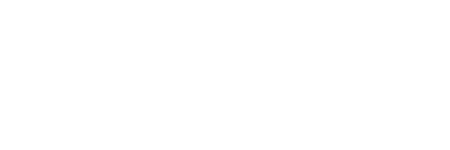

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.682375
1,1,C,6,0.0,0.0,0.529943
2,2,S,16,0.0,0.0,-1.040975


*** Running default Gamess job.
*** Updating coords (Pandas version).
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.291927
1,1,C,6,0.0,0.0,0.139495
2,2,S,16,0.0,0.0,-1.431423


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ukscad -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/ukscad.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ukscad -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/ukscad.out


*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
O      8.0      0.0000000000    0.0000000000    1.2919270000 
C      6.0      0.0000000000    0.0000000000    0.1394950000 
S     16.0      0.0000000000    0.0000000000   -1.4314230000 
 $END

*** Found Gamess executable: /opt/gamess/gamess.00.x
*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -504.44024327800003


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.291927
1,1,C,6,0.0,0.0,0.139495
2,2,S,16,0.0,0.0,-1.431423


In [20]:
demoFile = ESmulti(pd = geoms[0]['pd'])

#### Run geometry scan

Note the default case accepts the dictionary returned by `readMoldenGeoms()`, or a subset of geometries can be selected and/or preset manually, as demonstrated below.

*** Running geometry scan for 4 points.

*** Running geom 1/4.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.682375
1,1,C,6,0.0,0.0,0.529943
2,2,S,16,0.0,0.0,-1.040975


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x lwvxci -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/lwvxci.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x lwvxci -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/lwvxci.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -504.44024324359998
*** Gamess output file moved to /tmp/OCS_geomScan_test_jan2024_0.out

*** Running geom 2/4.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,-0.006393,-0.001623,1.669051
1,1,C,6,0.014751,0.003745,0.533996
2,2,S,16,-0.002343,-0.000595,-1.035830


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x mxkmvw -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/mxkmvw.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x mxkmvw -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/mxkmvw.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -504.43805569070003
*** Gamess output file moved to /tmp/OCS_geomScan_test_jan2024_1.out

*** Running geom 3/4.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.010129,-0.011510,1.662179
1,1,C,6,-0.023372,0.026559,0.497786
2,2,S,16,0.003712,-0.004218,-1.018788


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x flqhbe -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/flqhbe.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x flqhbe -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/flqhbe.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -504.4338781852
*** Gamess output file moved to /tmp/OCS_geomScan_test_jan2024_2.out

*** Running geom 4/4.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.019086,0.014969,1.742301
1,1,C,6,-0.044040,-0.034540,0.497968
2,2,S,16,0.006994,0.005485,-1.058951


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x lvaywa -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/lvaywa.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x lvaywa -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/lvaywa.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -504.42585458849999
*** Gamess output file moved to /tmp/OCS_geomScan_test_jan2024_3.out

*** Geom scan completed.


,0,1,2,E
0,"[0.0, 0.0, 1.682374503]","[0.0, 0.0, 0.529942878]","[0.0, 0.0, -1.040974997]",-504.440243
1,"[-0.00639275, -0.001623065, 1.66905131]","[0.014751229, 0.003745212, 0.533995684]","[-0.002342571, -0.000594759, -1.035830356]",-504.438056
2,"[0.01012876, -0.011510087, 1.662178978]","[-0.023372048, 0.026559449, 0.497786022]","[0.003711601, -0.004217777, -1.018788375]",-504.433878
3,"[0.019085602, 0.014968535, 1.742300554]","[-0.044039901, -0.034539797, 0.497968286]","[0.006993762, 0.005485097, -1.058951125]",-504.425855


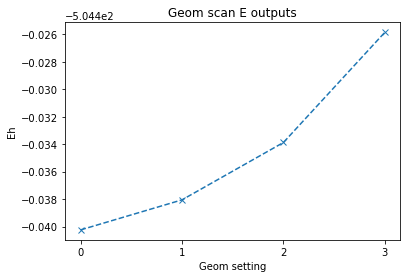

In [21]:
# Run a bond scan - pass `positionsDict` for the arbitrary positions case
# This will run ALL cases from `geoms`
demoFile.runGeomScan(positionsDict = geoms, fileBase = '/tmp/OCS_geomScan_test_jan2024')

#### Run with subselection

*** Running geometry scan for 2 points.

*** Running geom 1/2.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,-0.006393,-0.001623,1.669051
1,1,C,6,0.014751,0.003745,0.533996
2,2,S,16,-0.002343,-0.000595,-1.035830


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ssteqv -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/ssteqv.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ssteqv -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/ssteqv.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -504.43805569070003
*** Gamess output file moved to /tmp/OCS_geomScan_test_jan2024_1.out

*** Running geom 2/2.
*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.010129,-0.011510,1.662179
1,1,C,6,-0.023372,0.026559,0.497786
2,2,S,16,0.003712,-0.004218,-1.018788


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x zwyzzp -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/zwyzzp.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x zwyzzp -ddi 1 1 jake -scr /tmp/tmp9ci0tvpi > /tmp/tmp9ci0tvpi/zwyzzp.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -504.4338781852
*** Gamess output file moved to /tmp/OCS_geomScan_test_jan2024_2.out

*** Geom scan completed.


,0,1,2,E
1,"[-0.00639275, -0.001623065, 1.66905131]","[0.014751229, 0.003745212, 0.533995684]","[-0.002342571, -0.000594759, -1.035830356]",-504.438056
2,"[0.01012876, -0.011510087, 1.662178978]","[-0.023372048, 0.026559449, 0.497786022]","[0.003711601, -0.004217777, -1.018788375]",-504.433878


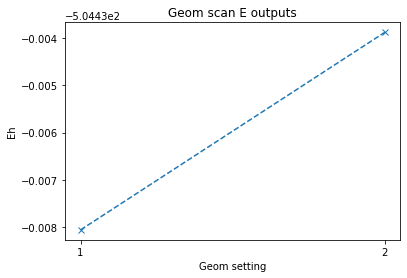

In [22]:
# Run a bond scan - pass `positionsDict` for the arbitrary positions case
# With 'keys' passed this will run subselected cases from `geoms`
demoFile.runGeomScan(positionsDict = geoms, fileBase = '/tmp/OCS_geomScan_test_jan2024', keys = [1,2])

## Versions

In [23]:
import scooby
scooby.Report(additional=['epsman', 'cclib', 'rdkit'])

--------------------------------------------------------------------------------
  Date: Fri Jan 26 13:08:16 2024 EST

                OS : Linux
            CPU(s) : 64
           Machine : x86_64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.7.10 (default, Feb 26 2021, 18:47:35)  [GCC 7.3.0]

            epsman : 0.0.1
             cclib : 1.7
             rdkit : 2023.03.2
             numpy : 1.19.2
             scipy : 1.6.1
           IPython : 7.21.0
        matplotlib : 3.3.4
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

In [24]:
# Check current Git commit for local ePSproc version
from pathlib import Path
import epsman as em

!git -C {Path(em.__file__).parent} branch
!git -C {Path(em.__file__).parent} log --format="%H" -n 1

  master
* restructure160221
beb05dfab9c83352e12f077aa92ce68f349ab5c4


In [25]:
# Check current remote commits
!git ls-remote --heads https://github.com/phockett/epsman

21b4357a169baf9fa7887c68bd1cf8f92c59642c	refs/heads/master
beb05dfab9c83352e12f077aa92ce68f349ab5c4	refs/heads/restructure160221
